# ÏÑ†ÌòïÌöåÍ∑Ä ÏòàÏãú 2 
- ÏùòÎ£åÎπÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜå

In [40]:

import numpy as np
from pandas import read_excel, DataFrame, melt, merge, get_dummies
from pca import pca
from pandas.api.types import CategoricalDtype
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

ÎØ∏Íµ≠ ÌôòÏûêÏùò ÏùòÎ£åÎπÑ
|Î≥ÄÏàò|	ÏùòÎØ∏|	Í∏∞ÌÉÄ|
|--|--|--|
age	|ÏàòÏùµÏûêÏùò Ïó∞Î†π|	ÏàòÏπòÌòï
sex	|Í≥ÑÏïΩÏûêÏùò ÏÑ±Î≥Ñ|	Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(female/male)
bmi	|ÎπÑÎßåÎèÑ. Î™∏Î¨¥Í≤åÎ•º ÌÇ§Ïùò Ï†úÍ≥±ÏúºÎ°ú ÎÇòÎàà Í∞í.	|ÏàòÏπòÌòï Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9|
children|	ÏùòÎ£åÎ≥¥ÌóòÏù¥ Ï†ÅÏö©ÎêòÎäî ÏûêÎÖÄ Ïàò	|ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞
smoker|	Ìù°Ïó∞ Ïó¨Î∂Ä	|Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(yes/no)
region|	Í±∞Ï£ºÏßÄÏó≠	|Î≤îÏ£ºÌòï(Î∂ÅÎèô: northeast, ÎÇ®Îèô: southeast / ÎÇ®ÏÑú: southwest / Î∂ÅÏÑú: northwest)|
expense|	ÏùòÎ£åÎπÑ|	ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞

In [41]:
origin = read_excel("https://data.hossam.kr/E04/insurance.xlsx")
origin

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ 

In [42]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Î≥µÏÇ¨ ÌõÑ Í≤∞Ï∏°ÏπòÏôÄ Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
edf = origin.copy()
print('Í≤∞Ï∏°Ïπò Í∞úÏàò')
print(edf.isna().sum())
print('----------------------------')
print('Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ')
print(edf.dtypes)


Í≤∞Ï∏°Ïπò Í∞úÏàò
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
----------------------------
Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Î≤îÏ£ºÌòï ÌÉÄÏûÖ Î≥ÄÌôò



In [43]:
# Î≤îÏ£ºÌòï ÌïÑÎìú Ïù¥Î¶Ñ
cnames = ['sex','smoker','region']
cnames

['sex', 'smoker', 'region']

In [44]:
def setCategory(df, fields=[], labelling=True):
    """
    Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú ÏßÄÏ†ïÎêú ÌïÑÎìúÎ•º Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÍ≤ΩÌïúÎã§.

    Parameters
    -------
    - df: Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    - fields: Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÍ≤ΩÌï† ÌïÑÎìúÎ™Ö Î¶¨Ïä§Ìä∏. Í∏∞Î≥∏Í∞íÏùÄ Îπà Î¶¨Ïä§Ìä∏(Ï†ÑÏ≤¥ ÌïÑÎìú ÎåÄÏÉÅ)

    Returns
    -------
    - cdf: Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÍ≤ΩÎêú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    """
    cdf = df.copy()
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Î≥ÄÏàòÎ™ÖÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    ilist = list(cdf.dtypes.index)
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Î≥ÄÏàòÌòïÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
    vlist = list(cdf.dtypes.values)

    # Î≥ÄÏàòÌòïÏóê ÎåÄÌïú Î∞òÎ≥µ Ï≤òÎ¶¨
    for i, v in enumerate(vlist):
        # Î≥ÄÏàòÌòïÏù¥ objectÏù¥Î©¥?
        if v == 'object':
            # Î≥ÄÏàòÎ™ÖÏùÑ Í∞ÄÏ†∏Ïò®Îã§.
            field_name = ilist[i]

            # ÎåÄÏÉÅ ÌïÑÎìú Î™©Î°ùÏù¥ ÏÑ§Ï†ïÎêòÏßÄ ÏïäÍ±∞ÎÇò(Ï†ÑÏ≤¥ÌïÑÎìú ÎåÄÏÉÅ), ÌòÑÏû¨ ÌïÑÎìúÍ∞Ä ÎåÄÏÉÅ ÌïÑÎìúÎ™©Î°ùÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§Î©¥?
            if not fields or field_name not in fields:
                continue

            # Í∞ÄÏ†∏Ïò® Î≥ÄÏàòÎ™ÖÏóê ÎåÄÌï¥ Í∞íÏùò Ï¢ÖÎ•òÎ≥ÑÎ°ú ÎπàÎèÑÎ•º Ïπ¥Ïö¥Ìä∏ Ìïú ÌõÑ Ïù∏Îç±Ïä§ Ïù¥Î¶ÑÏàúÏúºÎ°ú Ï†ïÎ†¨
            #vc = cdf[field_name].value_counts().sort_index()
            # print(vc)

            # Ïù∏Îç±Ïä§ Ïù¥Î¶ÑÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú Í∞íÏùò Ï¢ÖÎ•òÎ≥ÑÎ°ú Î∞òÎ≥µ Ï≤òÎ¶¨
            #for ii, vv in enumerate(list(vc.index)):
                # ÏùºÎ†®Î≤àÌò∏Í∞íÏúºÎ°ú ÏπòÌôò
                #cdf.loc[cdf[field_name] == vv, field_name] = ii

            # Ìï¥Îãπ Î≥ÄÏàòÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Î≤îÏ£ºÌòïÏúºÎ°ú Î≥ÄÌôò
            cdf[field_name] = cdf[field_name].astype('category')
            
            if labelling:
                mydict = {}
                
                for i, v in enumerate(cdf[field_name].dtypes.categories):
                    mydict[v] = i
                
                print(mydict)
                cdf[field_name] = cdf[field_name].map(mydict).astype(int)

    return cdf

In [45]:
# Î≤îÏ£ºÌòï Ïª¨Îüº ÌÉÄÏûÖ Î≥ÄÌôò
edf2 = setCategory(edf, fields=cnames, labelling=False)
edf2.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### 1. ÏàòÏπòÌòï Î≥ÄÏàò

#### 1) Í∏∞Ï¥à ÌÜµÍ≥ÑÎüâ ÌôïÏù∏

ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÄ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌÜµÍ≥ÑÍ∞íÏùÑ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥ Ï¢ãÎã§.


In [46]:
desc = edf2.describe()
desc

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

ÏùòÎ£åÎπÑ ÏßÄÏ∂ú Î≥ÄÏàòÏùò ÌÜµÍ≥ÑÍ∞íÏùÑ ÏÇ¥Ìé¥Î≥¥Î©¥ chargesÏùò Ï§ëÏïôÍ∞íÏù¥ 9382Í≥† ÌèâÍ∑†Ïù¥ 13270ÏûÑÏùÑ ÏïåÏàò ÏûàÎã§. ÌèâÍ∑†Í∞íÏù¥ Ï§ëÏïôÍ∞íÎ≥¥Îã§ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏùòÎ£åÎπÑ Î∂ÑÌè¨Îäî Ïò§Î•∏Ï™ΩÏúºÎ°ú Íº¨Î¶¨Í∞Ä Í∏¥ Î∂ÑÌè¨Í∞Ä Îê† Í≤ÉÏù¥Îã§. 

2) Ï†ÑÏ≤¥ ÏÉÅÏûê Í∑∏Î¶º ÌôïÏù∏

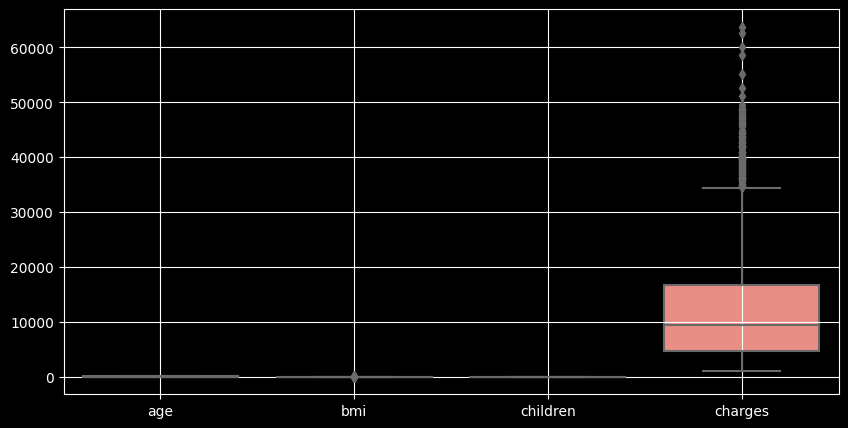

In [47]:
plt.figure(figsize=(10,5))
sb.boxplot(data=edf)
plt.grid()
plt.show()
plt.close()

3) Í∞úÎ≥Ñ ÏÉÅÏûêÍ∑∏Î¶º ÌôïÏù∏

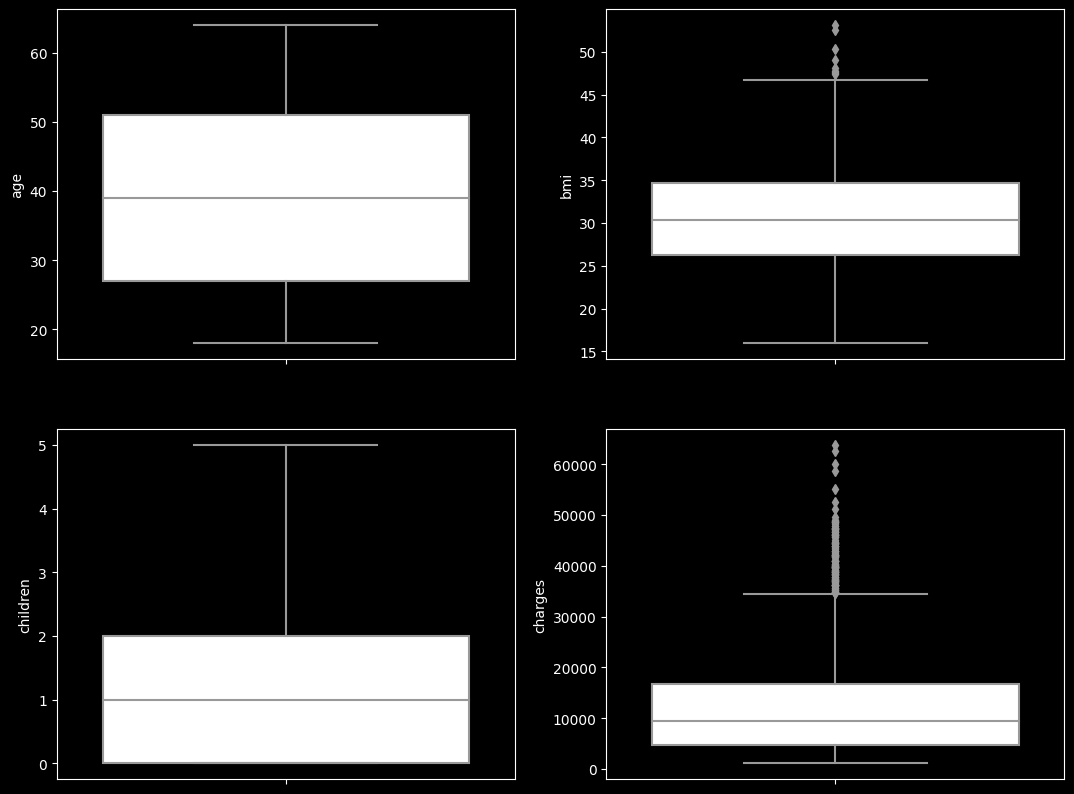

In [48]:
fig, ax = plt.subplots(2,2, figsize=(13,10))
rows = len(ax)
cols = len(ax[0])

for i in range(0,rows) :
    for j in range(0,cols) :
        idx = i * cols + j
        fieldName = desc.columns[idx]
        field = edf2[fieldName]
        sb.boxplot(edf, y=field, ax =ax[i][j],color='white')

        if idx+1 == len(desc.columns):
            break
plt.show()
plt.close()

4. ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

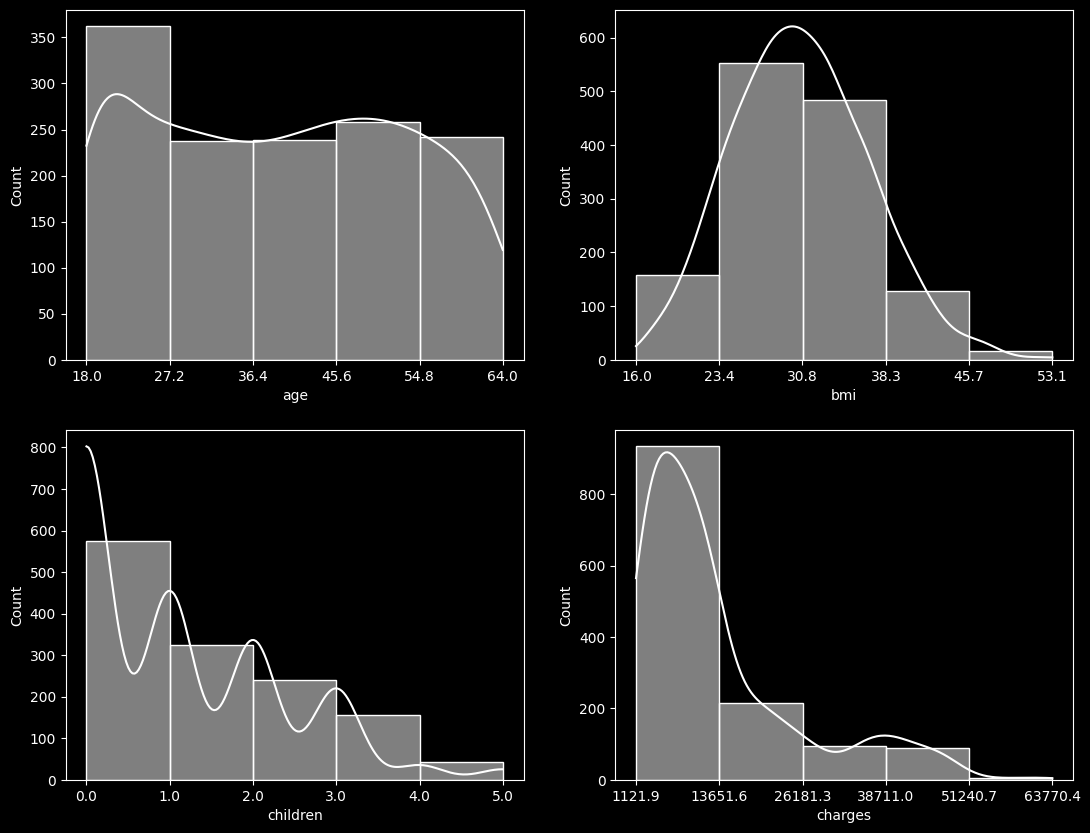

In [49]:
fig, ax = plt.subplots(2,2, figsize=(13,10))
rows = len(ax)
cols = len(ax[0])

for i in range(0,rows) :
    for j in range(0,cols) :
        idx = i * cols + j
        fieldName = desc.columns[idx]
        field = edf2[fieldName]
        hist, bins = np.histogram(field, bins=5)
        bins2 = np.round(bins, 1)
        
        sb.histplot(data=edf2, x=fieldName, bins=5, kde=True, ax=ax[i][j], color='white')
        ax[i][j].set_xticks(bins2)
        ax[i][j].set_xticklabels(bins2)

        if idx+1 == len(desc.columns):
            break
plt.show()
plt.close()

ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÇ¨ÎûåÎì§ÏùÄ Ïó∞Í∞Ñ $15000 Ïù¥ÌïòÏùò ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú bmi ÏßÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥Î©¥ Í≥ºÏ†úÏ∂© Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†àÎ∞ò Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïúÎã§. 

In [50]:
# ÏàòÏßÄÌòï Î≥ÄÏàòÎì§Ïùò Ïù¥Î¶Ñ
nnames = list(desc.columns)
nnames

['age', 'bmi', 'children', 'charges']

In [51]:
ndf = edf.filter(nnames)
ndf.head()

age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

### ÏÇ∞Ï†êÎèÑ ÌñâÎ†¨

<Figure size 2000x2000 with 0 Axes>

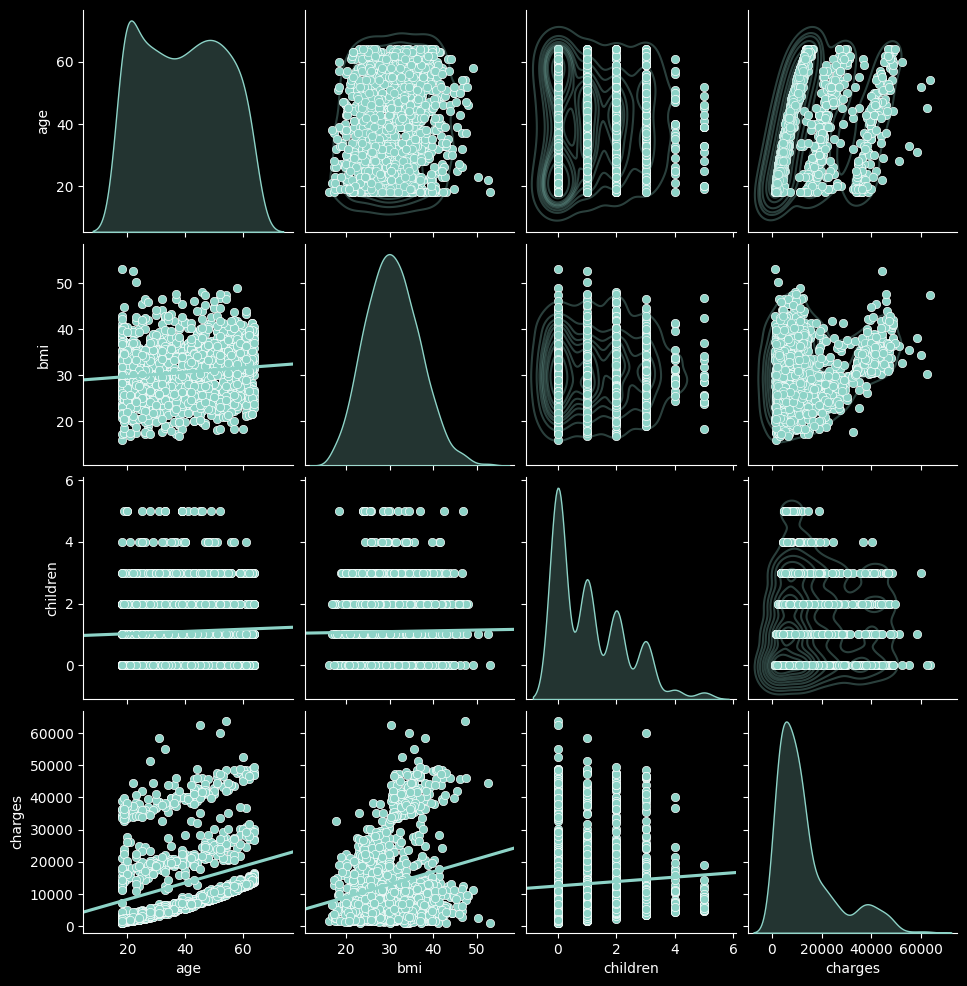

In [52]:
plt.figure(figsize=(20,20))
g = sb.pairplot(ndf,diag_kind='kde')
g.map_upper(sb.kdeplot,alpha = 0.3)
g.map_lower(sb.regplot, scatter = False, truncate = False, ci = False)
plt.show()
plt.close()


ÏúÑ Í∑∏ÎûòÌîÑ Ìå®ÌÑ¥ÏóêÏÑú ÌäπÏ†ïÌïú Í¥ÄÍ≥ÑÎ•º Ï∞æÍ∏∞Îäî Ïñ¥Î†µÎã§. 
Ïó∞Î†πÍ≥º ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏùò ÏÇ∞Ìè¨ÎèÑÎ•º Î≥¥Î©¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏßÅÏÑ†ÌòïÌÉúÏûÑÏùÑ Î≥º Ïàò ÏûàÎã§.
bmi ÏßÄÏàòÏôÄ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏùÄ ÌÅ¨Í≤å 2Í∞úÏùò Íµ∞ÏßëÏúºÎ°ú ÎÇòÎâòÏñ¥Ï†∏ ÏûàÎã§.
Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥ÏßÄ ÏïäÏßÄÎßå age-bmi, age-charges, children-chargesÍ∞Ä ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.

ÎÇòÏù¥Í∞Ä Îì§ÏàòÎ°ù ÏÇ¥Ï™ÑÏÑú bmiÎèÑ ÎÜíÏïÑÏßÄÎèÑ, Î∂ÄÏñëÍ∞ÄÏ°± ÏàòÍ∞Ä ÎßéÏúºÎãàÍπå ÏùòÎ£åÎπÑÍ∞Ä Ï¶ùÍ∞ÄÌïòÎãàÍπå. Î≠ê 


### ÏÉÅÍ¥ÄÌñâÎ†¨

ÎåÄÍ∞ÅÏÑ†ÏùÄ Î≥ÄÏàò ÏûêÏã†Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ìï≠ÏÉÅ 1Ïù¥ ÌëúÍ∏∞ÎêúÎã§.

ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îëê Î≥ÄÏàòÍ∞Ä Í∞ôÏùÄ Î∞©Ìñ•ÏúºÎ°ú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Í≥† ÌåêÎã®Ìï† ÏàòÏûàÍ≥†, -1Ïóê Í∞ÄÍπåÏö∏ÏÜåÎ°ù ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.

In [53]:
corr = ndf.corr(method='pearson')
corr

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

Î™®Îëê ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎã§. 
Ïó∞Î†πÍ≥º bmi ÏßÄÏàòÎäî ÎÇòÏù¥Í∞Ä Îì§Ïñ¥Í∞à ÏàòÎ°ù Î™∏Î¨¥Í≤åÍ∞Ä Ï¶ùÍ∞Ä ÎêòÎ©¥ÏÑú bmi ÏßÄÏàòÍ∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•ÏùÑ ÏÑ§Î™ÖÌï† Ïàò ÏûàÍ≥†, Î∂ÄÏñëÍ∞ÄÏ°± ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏù¥ ÎßéÏïÑÏßÑÎã§Í≥† Î≥¥Îäî Í≤ÉÎèÑ Ìï©Î¶¨Ï†Å


### 5) PCAÎ∂ÑÏÑù

ÌöåÍ∑ÄÎ∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÏöîÏù∏Îì§ÏùÑ ÏÑ†Ï†ïÌïòÍ∏∞ÏúÑÌï¥ Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïúÎã§. 

### Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
Î≤îÏ£ºÌòïÏùÄ PCAÎ•º ÏàòÌñâÌï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂úÌï¥ Îëî ndfÎ•º ÏÇ¨Ïö©ÌïúÎã§.

Ï¢ÖÏÜç Î≥ÄÏàòÏù∏ ÏùòÎ£åÎπÑ ÌïÑÎìúÎäî Ï†úÏô∏ÌïòÍ≥† ÏßÑÌñâÌïúÎã§.





In [54]:

def scalling(df, yname=None):
    """
    Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÌëúÏ§ÄÌôî ÌïúÎã§.

    Parameters
    -------
    - df: Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    - yname: Ï¢ÖÏÜçÎ≥ÄÏàò Ïù¥Î¶Ñ

    Returns
    -------
    - x_train_std_df: ÌëúÏ§ÄÌôîÎêú ÎèÖÎ¶ΩÎ≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    - y_train_std_df: ÌëúÏ§ÄÌôîÎêú Ï¢ÖÏÜçÎ≥ÄÏàò Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    """
    # ÌèâÏÜåÏóêÎäî ynameÏùÑ Ï†úÍ±∞Ìïú Ìï≠Î™©ÏùÑ ÏÇ¨Ïö©
    # ynameÏù¥ ÏûàÏßÄ ÏïäÎã§Î©¥ dfÎ•º Î≥µÏÇ¨
    x_train = df.drop([yname], axis=1) if yname else df.copy()
    x_train_std = StandardScaler().fit_transform(x_train)
    x_train_std_df = DataFrame(x_train_std, columns=x_train.columns)
    
    if yname:
        y_train = df.filter([yname])
        y_train_std = StandardScaler().fit_transform(y_train)
        y_train_std_df = DataFrame(y_train_std, columns=y_train.columns)

    if yname:
        result = (x_train_std_df, y_train_std_df)
    else:
        result = x_train_std_df

    return result

In [55]:
x_train_std_df, y_train_std_df = scalling(ndf[nnames], 'charges')
x_train_std_df

age       bmi  children
0    -1.438764 -0.453320 -0.908614
1    -1.509965  0.509621 -0.078767
2    -0.797954  0.383307  1.580926
3    -0.441948 -1.305531 -0.908614
4    -0.513149 -0.292556 -0.908614
...        ...       ...       ...
1333  0.768473  0.050297  1.580926
1334 -1.509965  0.206139 -0.908614
1335 -1.509965  1.014878 -0.908614
1336 -1.296362 -0.797813 -0.908614
1337  1.551686 -0.261388 -0.908614

[1338 rows x 3 columns]

### PCA 

In [56]:
model = pca()
# ÌëúÏ§ÄÌôî Í≤∞Í≥ºÎ•º ÌôúÏö©ÌïòÏó¨ Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ÏàòÌñâ
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']

best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
print(best_names)

topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [3] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [3] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
['children', 'age']


PC   feature   loading  type
0  PC1       age  0.692028  best
1  PC2  children  0.931148  best
2  PC3       age -0.717326  best
3  PC3       bmi  0.669385  weak

Í∑ºÎç∞ Ïôú bmiÍ∞Ä weakÏïº? 

## 2.Î≤îÏ£ºÌòï Î≥ÄÏàò


### 1) Ï¢ÖÎ•òÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏàòÎüâ ÌôïÏù∏

In [57]:
for name in cnames :
    print(edf2[name].value_counts())
    print('----------------')

sex
male      676
female    662
Name: count, dtype: int64
----------------
smoker
no     1064
yes     274
Name: count, dtype: int64
----------------
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64
----------------


### 2) Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

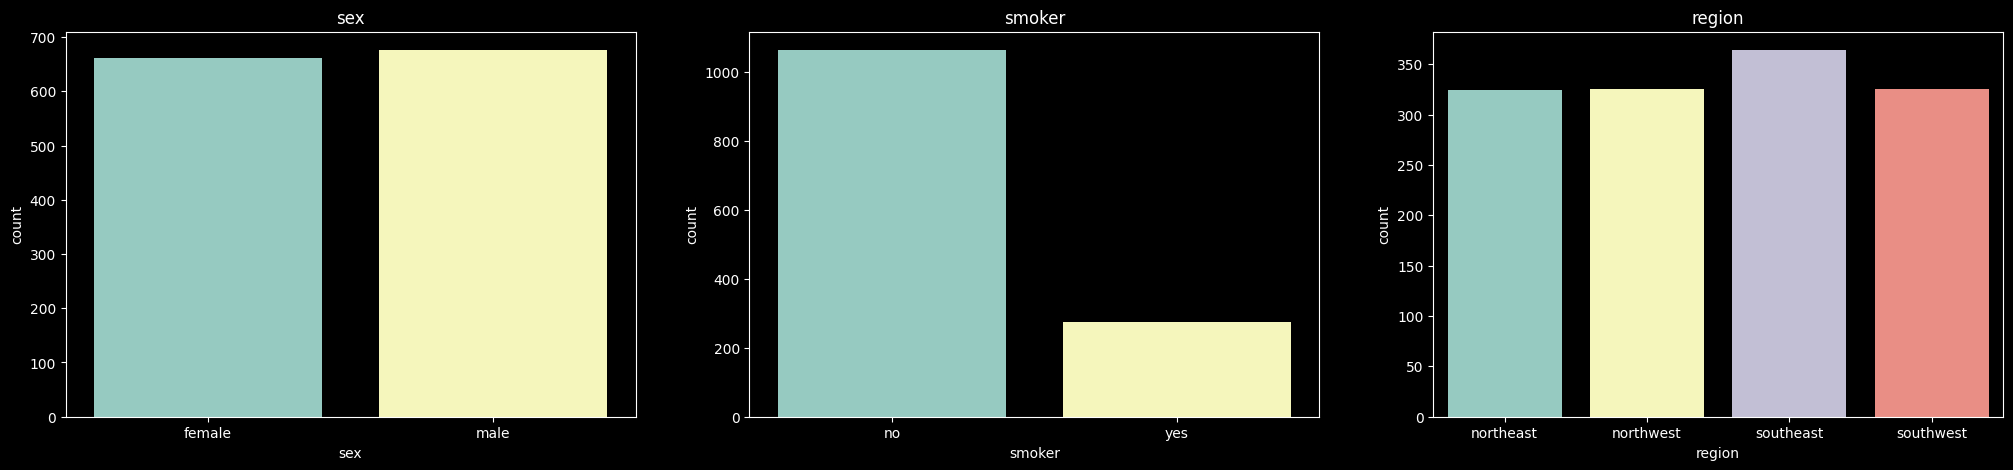

In [58]:
fig, ax = plt.subplots(1, len(cnames), figsize=(25, 5))

for i, v in enumerate(cnames):
    vc = DataFrame(edf2[v].value_counts(), columns=['count'])
    sb.barplot(data=vc, x=vc.index, y='count', ax=ax[i])
    ax[i].set_title(v)
    
plt.show()
plt.close()

ÎπÑÌù°Ïó∞ÏûêÍ∞Ä ÎßéÎã§. ÏÑ±Î≥ÑÍ≥º ÏßÄÏó≠ÏùÄ ÎπÑÏä∑Ìïú Î∂ÑÌè¨Î•º Î≥¥Ïù∏Îã§. Î∂ÑÏÇ∞Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÌÜµÏ†ú ÏöîÏù∏ÏùÑ ÎÑ£Îäî Í≤ÉÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÎã§.

3) Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê Îî∞Îùº ÌèâÍ∑†Ïù¥ Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞

ÎùºÎ≤®ÎßÅÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±


In [59]:
# Î≤îÏ£ºÌòï Ïª¨Îüº ÌÉÄÏûÖ Î≥ÄÌôò
ldf = setCategory(edf, fields=cnames, labelling=True)

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [60]:
ldf.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

Î∂ÑÏÇ∞Î∂ÑÏÑù

In [61]:
lm = ols('charges ~ C(sex)+C(smoker)+C(region)+C(sex):C(smoker)+C(smoker):C(region)+C(region):C(sex)+C(sex):C(smoker):C(region)', data=ldf).fit()
lmdf = anova_lm(lm)
lmdf['Í≤∞Í≥º'] = lmdf['PR(>F)'] < 0.05
lmdf

df        sum_sq       mean_sq            F  \
C(sex)                         1.0  6.435902e+08  6.435902e+08    11.730026   
C(smoker)                      1.0  1.208777e+11  1.208777e+11  2203.108485   
C(region)                      3.0  1.078004e+08  3.593345e+07     0.654920   
C(sex):C(smoker)               1.0  4.904163e+08  4.904163e+08     8.938290   
C(smoker):C(region)            3.0  1.344084e+09  4.480281e+08     8.165726   
C(region):C(sex)               3.0  1.382281e+06  4.607604e+05     0.008398   
C(sex):C(smoker):C(region)     3.0  7.517058e+07  2.505686e+07     0.456684   
Residual                    1322.0  7.253404e+10  5.486690e+07          NaN   

                                   PR(>F)     Í≤∞Í≥º  
C(sex)                       6.338371e-04   True  
C(smoker)                   7.872124e-284   True  
C(region)                    5.799028e-01  False  
C(sex):C(smoker)             2.844155e-03   True  
C(smoker):C(region)          2.181106e-05   True  
C(region):C(sex)             9.989439e-01  False  
C(sex):C(smoker):C(region)   7.126143e-01  False  
Residual                              NaN  False

ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞ Ïó¨Î∂ÄÏóê ÎåÄÌïú pÍ∞íÏù¥ Î™®Îëê 0.05ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Îëê ÏöîÏù∏ÏùÄ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.

ÏÑ±Î≥ÑÍ≥º Ìù°Ïó∞Îüâ, Ìù°Ïó∞ÎüâÍ≥º ÏßÄÏó≠Í∞ÑÏóêÎäî ÍµêÌò∏ ÏûëÏö©(Ìïú ÏöîÏù∏Ïùò Ìö®Í≥ºÍ∞Ä Îã§Î•∏ ÏöîÏù∏Ïùò ÏàòÏ§ÄÏóê ÏùòÏ°¥ÌïòÎäî Í≤ΩÏö∞) Ìö®Í≥ºÍ∞Ä ÏûàÏùåÏùÑ Î∞úÍ≤¨ÎêòÏóàÎã§. 

ÍµêÌò∏ÏûëÏö©ÏùÑ Î≥¥Ïù¥Îäî Î≥ÄÏàòÍ∞ÑÏùò ÎπÑÍµê

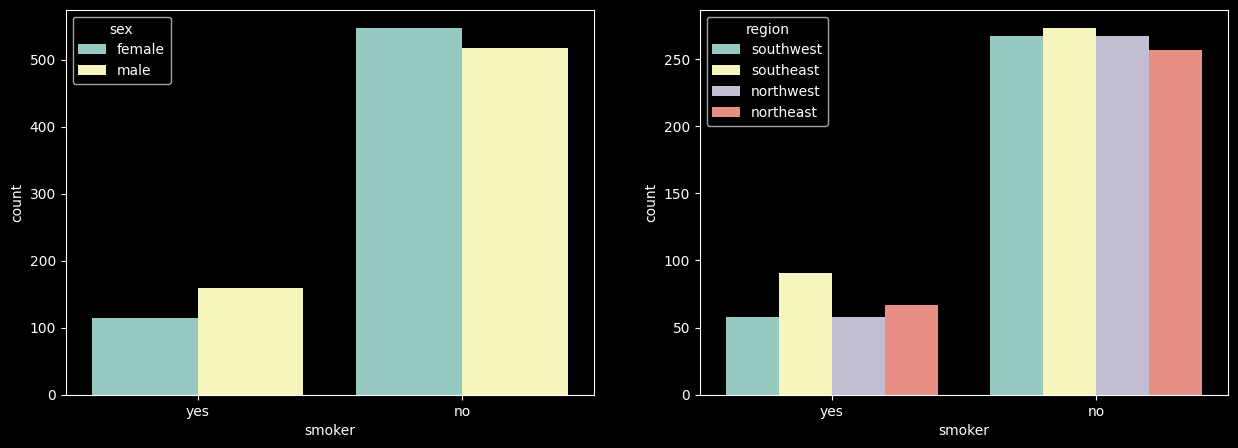

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sb.countplot(data=edf, x='smoker',hue='sex',ax=ax1)
sb.countplot(data=edf, x='smoker',hue='region',ax=ax2)

plt.show()
plt.close()

### 04. ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†Ï†ïÎêú ÏöîÏù∏


|Íµ¨Î∂Ñ|	Î≥ÄÏàò|	ÏùòÎØ∏|	Í∏∞ÌÉÄ|
|--|--|--|--|
Ï¢ÖÏÜçÎ≥ÄÏàò|	expense|	ÏùòÎ£åÎπÑ	|ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞
ÎèÖÎ¶ΩÎ≥ÄÏàò|	age	|ÏàòÏùµÏûêÏùò Ïó∞Î†π	|ÏàòÏπòÌòï
ÎèÖÎ¶ΩÎ≥ÄÏàò|	bmi|	ÎØ∏ÎßåÎèÑ. Î™∏Î¨¥Í≤åÎ•º ÌÇ§Ïùò Ï†úÍ≥±ÏúºÎ°ú ÎÇòÎàà Í∞í.	|ÏàòÏπòÌòï Ï†ïÏÉÅÎ≤îÏúÑ: 18.5~24.9
ÎèÖÎ¶ΩÎ≥ÄÏàò|	children|	ÏùòÎ£åÎ≥¥ÌóòÏù¥ Ï†ÅÏö©ÎêòÎäî ÏûêÎÖÄ Ïàò	|ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞
ÌÜµÏ†úÏöîÏù∏|	sex	|Í≥ÑÏïΩÏûêÏùò ÏÑ±Î≥Ñ|	Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(female/male)
ÌÜµÏ†úÏöîÏù∏|	smoker|	Ìù°Ïó∞ Ïó¨Î∂Ä	|Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞(yes/no)


### Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù

- case1 : Î™®Îì† Î≥ÄÏàò Ï†ÅÏö©
- case2 : bmiÎ•º Ï†úÍ±∞ÌïòÍ≥† Ï†ÅÏö©
- case3 : Î™®Îì† Î≥ÄÏàò Ï†ÅÏö© + ÌëúÏ§ÄÌôî Ï†ÅÏö©
- case4 : bmiÎ•º Ï†úÍ±∞ ÌõÑ Ï†ÅÏö© + ÌëúÏ§ÄÌôî Ï†ÅÏö©

#### Î∂ÑÏÑù ÏºÄÏù¥Ïä§Ïóê Îî∞Î•∏ Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [63]:


def get_df(case_number, is_scale=False):
    # bmiÎ•º Ï†úÍ±∞ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    if case_number == 1:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'bmi', 'children', 'sex', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['sex', 'smoker']
    # bmiÎ•º Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 2:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'children', 'sex', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['sex', 'smoker']
    # ÏÑ±Î≥ÑÏùÑ Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 3:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'bmi', 'children', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['smoker']
    # ÏÑ±Î≥ÑÍ≥º bmiÏùÑ Ï†úÍ±∞Ìïú Í≤ΩÏö∞
    elif case_number == 4:
        # ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames1 = ['charges', 'age', 'children', 'smoker']
        # fname1 Ï§ëÏóêÏÑú ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï≤òÎ¶¨Ìï† Î≥ÄÏàò Ïù¥Î¶ÑÎì§
        fnames2 = ['smoker']
        
    # ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞
    if not is_scale:
        tmp = origin.filter(fnames1)
    # ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©Ìïú Í≤ΩÏö∞
    else:
        # ÎØ∏Î¶¨ Ï†ÅÏö©Ìï¥ Îëî ÌëúÏ§ÄÌôî Í≤∞Í≥ºÎ•º Î≥ëÌï©
        left = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True).filter(fnames1)
        # ÏõêÎ≥∏ÏóêÏÑú Î™ÖÎ™©ÌòïÎßå Îã§Ïãú Ï∂îÏ∂ú
        right = origin.filter(fnames2)
        # Í≤∞Ìï©
        tmp = merge(left, right, left_index=True, right_index=True)
        None
        
    tmp2 = get_dummies(tmp, columns=fnames2, drop_first=True, dtype='int')
    return tmp2

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas import MultiIndex, DatetimeIndex, Series



class OlsResult:
    def __init__(self):
        self._model = None
        self._fit = None
        self._summary = None
        self._table = None
        self._result = None
        self._goodness = None
        self._varstr = None

    @property
    def model(self):
        """
        Î∂ÑÏÑùÎ™®Îç∏
        """
        return self._model

    @model.setter
    def model(self, value):
        self._model = value

    @property
    def fit(self):
        """
        Î∂ÑÏÑùÍ≤∞Í≥º Í∞ùÏ≤¥
        """
        return self._fit

    @fit.setter
    def fit(self, value):
        self._fit = value

    @property
    def summary(self):
        """
        Î∂ÑÏÑùÍ≤∞Í≥º ÏöîÏïΩ Î≥¥Í≥†
        """
        return self._summary

    @summary.setter
    def summary(self, value):
        self._summary = value

    @property
    def table(self):
        """
        Í≤∞Í≥ºÌëú
        """
        return self._table

    @table.setter
    def table(self, value):
        self._table = value

    @property
    def result(self):
        """
        Í≤∞Í≥ºÌëú Î∂ÄÍ∞Ä ÏÑ§Î™Ö
        """
        return self._result

    @result.setter
    def result(self, value):
        self._result = value

    @property
    def goodness(self):
        """
        Î™®Ìòï Ï†ÅÌï©ÎèÑ Î≥¥Í≥†
        """
        return self._goodness

    @goodness.setter
    def goodness(self, value):
        self._goodness = value

    @property
    def varstr(self):
        """
        ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
        """
        return self._varstr

    @varstr.setter
    def varstr(self, value):
        self._varstr = value



def myOls(data, y=None, x=None, expr=None):
    """
    Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌïúÎã§.

    Parameters
    -------
    - data : Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ
    - y: Ï¢ÖÏÜçÎ≥ÄÏàò Ïù¥Î¶Ñ
    - x: ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïù¥Î¶ÑÎì§(Î¶¨Ïä§Ìä∏)
    """

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥µÏÇ¨
    df = data.copy()

    # Ï¢ÖÏÜçÎ≥ÄÏàò~ÎèÖÎ¶ΩÎ≥ÄÏàò1+ÎèÖÎ¶ΩÎ≥ÄÏàò2+ÎèÖÎ¶ΩÎ≥ÄÏàò3+... ÌòïÌÉúÏùò ÏãùÏùÑ ÏÉùÏÑ±
    if not expr:
        # ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïù¥Î¶ÑÏù¥ Î¶¨Ïä§Ìä∏Í∞Ä ÏïÑÎãàÎùºÎ©¥ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
        if type(x) != list:
            x = [x]
        expr = "%s~%s" % (y, "+".join(x))
    else:
        x = []
        p = expr.find('~')
        y = expr[:p].strip()
        x_tmp = expr[p+1:]
        x_list = x_tmp.split('+')
            
        for i in x_list:
            k = i.strip()
                
            if k:
                x.append(k)

    # ÌöåÍ∑ÄÎ™®Îç∏ ÏÉùÏÑ±
    model = ols(expr, data=data)
    # Î∂ÑÏÑù ÏàòÌñâ
    fit = model.fit()

    # ÌååÏù¥Ïç¨ Î∂ÑÏÑùÍ≤∞Í≥ºÎ•º Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïúÎã§.
    summary = fit.summary()

    # Ï≤´ Î≤àÏß∏, ÏÑ∏ Î≤àÏß∏ ÌëúÏùò ÎÇ¥Ïö©ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∂ÑÌï¥
    my = {}

    for k in range(0, 3, 2):
        items = summary.tables[k].data
        # print(items)

        for item in items:
            # print(item)
            n = len(item)

            for i in range(0, n, 2):
                key = item[i].strip()[:-1]
                value = item[i+1].strip()

                if key and value:
                    my[key] = value

    # Îëê Î≤àÏß∏ ÌëúÏùò ÎÇ¥Ïö©ÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Î∂ÑÌï¥ÌïòÏó¨ myÏóê Ï∂îÍ∞Ä
    my['variables'] = []
    name_list = list(data.columns)
    #print(name_list)

    for i, v in enumerate(summary.tables[1].data):
        if i == 0:
            continue

        # Î≥ÄÏàòÏùò Ïù¥Î¶Ñ
        name = v[0].strip()

        vif = 0

        # InterceptÎäî Ï†úÏô∏
        if name in name_list:
            # Î≥ÄÏàòÏùò Ïù¥Î¶Ñ Î™©Î°ùÏóêÏÑú ÌòÑÏû¨ Î≥ÄÏàòÍ∞Ä Î™á Î≤àÏß∏ Ìï≠Î™©Ïù∏ÏßÄ Ï∞æÍ∏∞ 
            j = name_list.index(name)
            vif = variance_inflation_factor(data, j)

        my['variables'].append({
            "name": name,
            "coef": v[1].strip(),
            "std err": v[2].strip(),
            "t": v[3].strip(),
            "P-value": v[4].strip(),
            "Beta": 0,
            "VIF": vif,
        })

    # Í≤∞Í≥ºÌëúÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Íµ¨ÏÑ±
    mylist = []
    yname_list = []
    xname_list = []

    for i in my['variables']:
        if i['name'] == 'Intercept':
            continue

        yname_list.append(y)
        xname_list.append(i['name'])

        item = {
            "B": i['coef'],
            "ÌëúÏ§ÄÏò§Ï∞®": i['std err'],
            "Œ≤": i['Beta'],
            "t": "%s*" % i['t'],
            "Ïú†ÏùòÌôïÎ•†": i['P-value'],
            "VIF": i["VIF"]
        }

        mylist.append(item)

    table = DataFrame(mylist,
                   index=MultiIndex.from_arrays([yname_list, xname_list], names=['Ï¢ÖÏÜçÎ≥ÄÏàò', 'ÎèÖÎ¶ΩÎ≥ÄÏàò']))
    
    # Î∂ÑÏÑùÍ≤∞Í≥º
    result = "ùëÖ(%s), ùëÖ^2(%s), ùêπ(%s), Ïú†ÏùòÌôïÎ•†(%s), Durbin-Watson(%s)" % (my['R-squared'], my['Adj. R-squared'], my['F-statistic'], my['Prob (F-statistic)'], my['Durbin-Watson'])

    # Î™®Ìòï Ï†ÅÌï©ÎèÑ Î≥¥Í≥†
    goodness = "%sÏóê ÎåÄÌïòÏó¨ %sÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú %s(F(%s,%s) = %s, p < 0.05)." % (y, ",".join(x), "Ïú†ÏùòÌïòÎã§" if float(my['Prob (F-statistic)']) < 0.05 else "Ïú†ÏùòÌïòÏßÄ ÏïäÎã§", my['Df Model'], my['Df Residuals'], my['F-statistic'])

    # ÎèÖÎ¶ΩÎ≥ÄÏàò Î≥¥Í≥†
    varstr = []

    for i, v in enumerate(my['variables']):
        if i == 0:
            continue
        
        s = "%sÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî %s(p%s0.05)Î°ú, %sÏóê ÎåÄÌïòÏó¨ %s."
        k = s % (v['name'], v['coef'], "<" if float(v['P-value']) < 0.05 else '>', y, 'Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§' if float(v['P-value']) < 0.05 else 'Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§')

        varstr.append(k)

    ols_result = OlsResult()
    ols_result.model = model
    ols_result.fit = fit
    ols_result.summary = summary
    ols_result.table = table
    ols_result.result = result
    ols_result.goodness = goodness
    ols_result.varstr = varstr

    return ols_result



In [65]:
target_df = get_df(3, True)
print(target_df.head())

# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïù¥Î¶ÑÎßå Ï∂îÏ∂ú
xnames = list(target_df.columns)
xnames.remove('charges')
#xnames

ols_result = myOls(target_df, y='charges', x=xnames)

print(ols_result.table)
print(ols_result.result, end="\n\n")

print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

    charges       age       bmi  children  smoker_yes
0  0.298584 -1.438764 -0.453320 -0.908614           1
1 -0.953689 -1.509965  0.509621 -0.078767           0
2 -0.728675 -0.797954  0.383307  1.580926           0
3  0.719843 -0.441948 -1.305531 -0.908614           0
4 -0.776802 -0.513149 -0.292556 -0.908614           0
                         B   ÌëúÏ§ÄÏò§Ï∞®  Œ≤        t   Ïú†ÏùòÌôïÎ•†       VIF
Ï¢ÖÏÜçÎ≥ÄÏàò    ÎèÖÎ¶ΩÎ≥ÄÏàò                                                  
charges age         0.2992  0.014  0  21.675*  0.000  1.243647
        bmi         0.1621  0.014  0  11.756*  0.000  1.082342
        children    0.0471  0.014  0   3.436*  0.001  1.008148
        smoker_yes  1.9670  0.034  0  57.904*  0.000  2.321101
ùëÖ(0.750), ùëÖ^2(0.749), ùêπ(998.1), Ïú†ÏùòÌôïÎ•†(0.00), Durbin-Watson(2.087)

chargesÏóê ÎåÄÌïòÏó¨ age,bmi,children,smoker_yesÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(4,1333) = 998.1, p < 0.05).

age

### 3. Í≤∞Í≥º ÎπÑÍµê

#### 1) ÎÇòÏù¥Ïóê Îî∞Î•∏ ÏùòÎ£åÎπÑ ÏßÄÏ∂ú

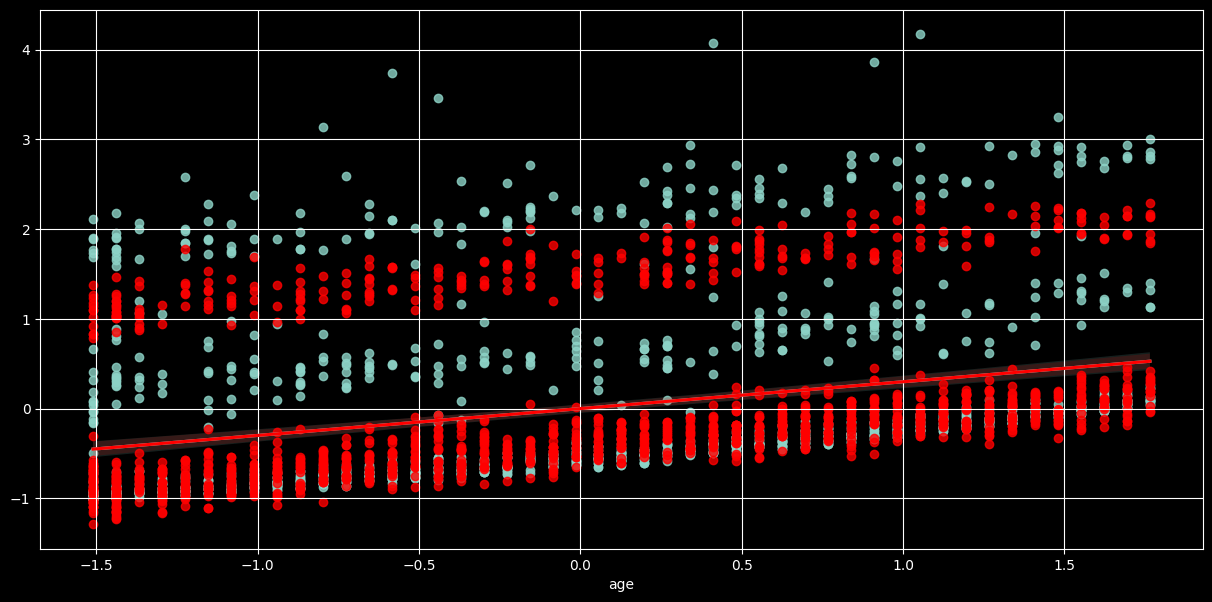

In [66]:
plt.figure(figsize=(15,7))
sb.regplot(data=target_df,x='age',y='charges')
sb.regplot(data=target_df,x='age',y=ols_result.fit.fittedvalues,color='red')
plt.grid()
plt.show()
plt.close()

### 2) BMIÏóê Îî∞Î•∏ ÏùòÎ£åÎπÑ ÏßÄÏ∂ú ÎπÑÍµê

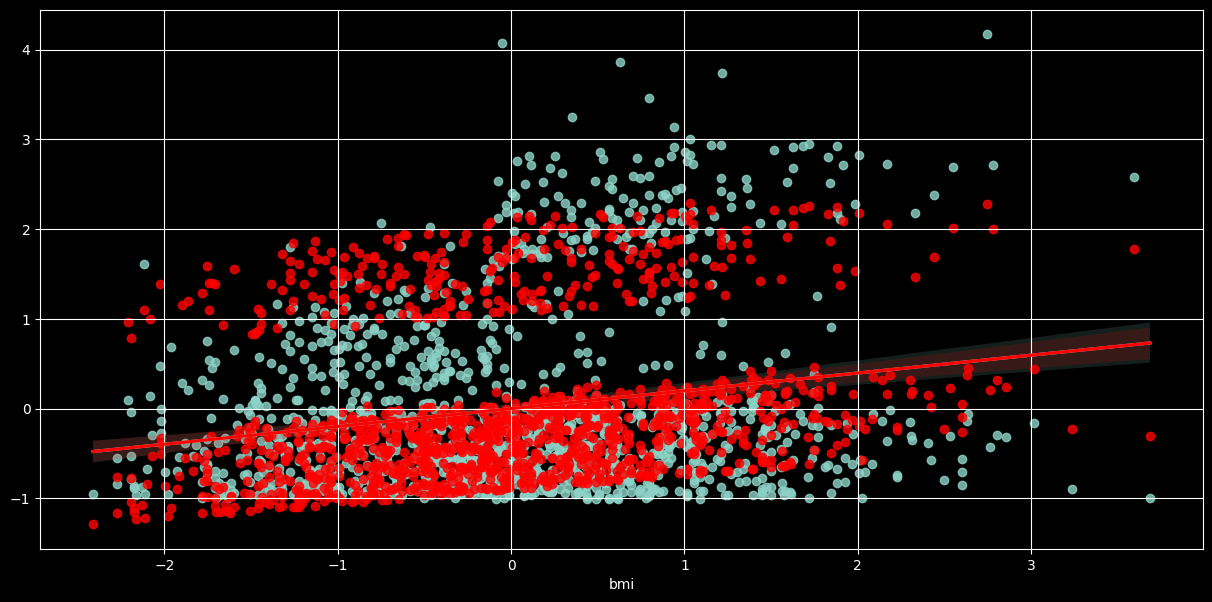

In [67]:
plt.figure(figsize=(15,7))
sb.regplot(data=target_df,x='bmi',y='charges')
sb.regplot(data=target_df,x='bmi',y=ols_result.fit.fittedvalues,color='red')
plt.grid()
plt.show()
plt.close()

## Îç∞Ïù¥ÌÑ∞ ÎèÑÎ©îÏù∏ ÏßÄÏãù

ÎèÑÎ©îÏù∏ ÏßÄÏãùÏù¥ÎûÄ ÌäπÏ†ï Î∂ÑÏïºÏùò Ï†ÑÎ¨∏ÌôîÎêú ÏßÄÏãùÏùÑ ÎßêÌïúÎã§. ex) ÎÖ∏ÌïòÏö∞

ÎèÑÎ©îÏù∏ ÏßÄÏãùÏùÑ ÌôúÏö©ÌïòÎ©¥ ÎèÑÏ∂úÎêú Î∂ÑÏÑùÎ™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞úÏÑ†Ìï† Ïàò ÏûàÎã§.


### 1. ÏùòÎ£åÎπÑ ÏßÄÏ∂ú

Ïó∞Î†πÏùÄ ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏóê ÎåÄÌï¥ ÏùºÏ†ïÌïòÏßÄ ÏïäÎã§. 20-30ÎåÄÏôÄ 70ÎåÄ Ïù¥ÏÉÅÏùò ÏùòÎ£åÎπÑ ÏßÄÏ∂úÏùÄ ÌÅ¨Í≤å ÎÇ† Ïàò Î∞ñÏóê ÏóÜÎã§. (ÎÖ∏ÌïòÏö∞)

Í∏∞Ï°¥Ïùò Ïó∞Î†π Î≥ÄÏàòÎäî Ï†ÑÌòïÏ†ÅÏù∏ ÏÑ†ÌòïÌöåÍ∑Ä Î∞©Ï†ïÏãùÏùÑ Îî∞Î•∏Îã§. 

$y = a_1x + b$ 

ÌïòÏßÄÎßå Í≥†Ïó∞Î†πÎåÄÏùºÏàòÎ°ù Ï¶ùÍ∞ÄÌè≠Ïù¥ Ïª§ÏßÄÎäî ÌòÑÏÉÅÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÎÜíÏùÄ Ï∞®ÏàòÏùò Ìï≠ÏùÑ ÌöåÍ∑Ä Î™®Îç∏Ïóê Ï∂îÍ∞ÄÌï¥ÏÑú Îã§Ìï≠ÏãùÏúºÎ°ú ÎßåÎì§Ïñ¥ Ï£ºÎ©¥ ÎêúÎã§.

$y = {a_2}^2x + {a_1}x + b$

### Ïó∞Î†πÏùÑ Ï†úÍ≥±Ìïú ÌòïÌÉúÎ°ú Ïó∞Î†π Î≥ÄÏàò ÍµêÏ≤¥

In [68]:
tmp_df = DataFrame({'age2':origin['age'] **2}, index = origin.index)
age2_std = StandardScaler().fit_transform(tmp_df)
target_df['age'] = age2_std
target_df.head()

charges       age       bmi  children  smoker_yes
0  0.298584 -1.220462 -0.453320 -0.908614           1
1 -0.953689 -1.253341  0.509621 -0.078767           0
2 -0.728675 -0.844579  0.383307  1.580926           0
3  0.719843 -0.573551 -1.305531 -0.908614           0
4 -0.776802 -0.631311 -0.292556 -0.908614           0

ÌöåÍ∑ÄÎ∂ÑÏÑù ÏàòÌñâ

In [70]:
xnames = list(target_df.columns) # ['charges', 'age', 'bmi', 'children', 'smoker_yes']
xnames.remove('charges')

ols_result = myOls(target_df, y='charges', x=xnames)
ols_result.table

B   ÌëúÏ§ÄÏò§Ï∞®  Œ≤        t   Ïú†ÏùòÌôïÎ•†       VIF
Ï¢ÖÏÜçÎ≥ÄÏàò    ÎèÖÎ¶ΩÎ≥ÄÏàò                                                  
charges age         0.3036  0.014  0  22.129*  0.000  1.251226
        bmi         0.1603  0.014  0  11.689*  0.000  1.082276
        children    0.0608  0.014  0   4.464*  0.000  1.010457
        smoker_yes  1.9679  0.034  0  58.247*  0.000  2.331466

In [71]:
ols_result.result

'ùëÖ(0.752), ùëÖ^2(0.752), ùêπ(1013.), Ïú†ÏùòÌôïÎ•†(0.00), Durbin-Watson(2.094)'

In [78]:
print(ols_result.goodness, end="\n\n")

# chargesÏóê ÎåÄÌïòÏó¨ age,bmi,children,smoker_yesÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(4,1333) = 1013., p < 0.05).

In [79]:
for i in ols_result.varstr :
    print(i)

ageÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.3036(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
bmiÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.1603(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
childrenÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0608(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
smoker_yesÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 1.9679(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.


### 2. ÎπÑÎßåÎèÑ(bmi)

BMIÎäî ÌäπÏ†Ä „ÖáÍµ¨Í∞ÑÏóêÏÑúÏùò ÏòÅÌñ•ÏùÄ Ï†ÅÏßÄÎßå Í∑∏ Íµ¨Í∞ÑÏùÑ ÎÑòÏñ¥Í∞ÄÎ©¥ Í∞ïÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.

EDA(ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù)ÏùÑ ÏßÑÌñâÌïòÎäî Í≥ºÏ†ïÏóêÏÑú BMIÍ∞Ä 30 Ïù¥ÏÉÅÏù∏ ÏÇ¨ÎûåÍ≥º 30 ÎØ∏ÎßåÏù∏ ÏÇ¨ÎûåÎì§ÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÏùåÏùÑ ÌååÏïÖÌïòÏòÄÎã§.

Ïù¥ ÎÇ¥Ïö©ÏùÑ ÎçîÎØ∏Î≥ÄÏàòÎ°ú Ï∂îÍ∞ÄÌï† Ïàò ÏûàÎã§. (Ï†ïÏÉÅ/ÎπÑÎßå)


#### BMIÏóê ÎåÄÌïú ÎπÑÎßåÎèÑ ÌååÏÉù Î≥ÄÏàò ÎßåÎì§Í∏∞

In [82]:
tmp_df = origin.filter(['bmi'])
# 30Ïù¥ ÎÑòÏñ¥Í∞ÄÎ©¥ intÎ°ú Î∞îÍøîÎùº (false/TrueÍ∞Ä 0Í≥º 1Îê®)
tmp_df['obesity'] = tmp_df['bmi'] >= 30  
tmp_df['obesity'] = tmp_df['obesity'].astype(int) 
tmp_df


bmi  obesity
0     27.900        0
1     33.770        1
2     33.000        1
3     22.705        0
4     28.880        0
...      ...      ...
1333  30.970        1
1334  31.920        1
1335  36.850        1
1336  25.800        0
1337  29.070        0

[1338 rows x 2 columns]

ÌååÏÉùÎ≥ÄÏàòÎ•º ÏõêÎûòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Í≤∞Ìï©

In [83]:
target_df['obesity'] = tmp_df['obesity']
target_df.head()

charges       age       bmi  children  smoker_yes  obesity
0  0.298584 -1.220462 -0.453320 -0.908614           1        0
1 -0.953689 -1.253341  0.509621 -0.078767           0        1
2 -0.728675 -0.844579  0.383307  1.580926           0        1
3  0.719843 -0.573551 -1.305531 -0.908614           0        0
4 -0.776802 -0.631311 -0.292556 -0.908614           0        0

### ÌöåÍ∑ÄÎ∂ÑÏÑù ÏàòÌñâ

In [87]:
xnames = list(target_df.columns)
xnames.remove('charges')
ols_result = myOls(target_df, y='charges', x=xnames)
ols_result.table

B   ÌëúÏ§ÄÏò§Ï∞®  Œ≤        t   Ïú†ÏùòÌôïÎ•†       VIF
Ï¢ÖÏÜçÎ≥ÄÏàò    ÎèÖÎ¶ΩÎ≥ÄÏàò                                                  
charges age         0.3032  0.014  0  22.302*  0.000  1.313720
        bmi         0.0685  0.023  0   3.043*  0.002  1.920042
        children    0.0609  0.014  0   4.509*  0.000  1.012493
        smoker_yes  1.9684  0.033  0  58.813*  0.000  3.388612
        obesity     0.2304  0.045  0   5.119*  0.000  2.082544

In [88]:
print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")
for i in ols_result.varstr:
    print(i)

ùëÖ(0.757), ùëÖ^2(0.756), ùêπ(830.8), Ïú†ÏùòÌôïÎ•†(0.00), Durbin-Watson(2.098)

chargesÏóê ÎåÄÌïòÏó¨ age,bmi,children,smoker_yes,obesityÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(5,1332) = 830.8, p < 0.05).

ageÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.3032(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
bmiÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0685(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
childrenÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0609(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
smoker_yesÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 1.9684(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
obesityÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.2304(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.


## 3.ÍµêÌö®ÏûëÏö© Ï∂îÍ∞Ä

#### ÎπÑÎßåÎèÑÏôÄ Ìù°Ïó∞Ïó¨Î∂Ä

In [92]:
xnames = list(target_df.columns)
xnames.remove('charges')
ols_result = myOls(target_df,expr="charges~age+bmi+children+smoker_yes+obesity+bmi*smoker_yes")
ols_result.table

B   ÌëúÏ§ÄÏò§Ï∞®  Œ≤        t   Ïú†ÏùòÌôïÎ•†       VIF
Ï¢ÖÏÜçÎ≥ÄÏàò    ÎèÖÎ¶ΩÎ≥ÄÏàò                                                       
charges age              0.3109  0.011  0  28.781*  0.000  1.313720
        bmi             -0.0981  0.019  0  -5.203*  0.000  1.920042
        children         0.0648  0.011  0   6.041*  0.000  1.012493
        smoker_yes       1.9651  0.027  0  73.902*  0.000  3.388612
        obesity          0.2476  0.036  0   6.925*  0.000  2.082544
        bmi:smoker_yes   0.7242  0.026  0  27.919*  0.000  0.000000

In [93]:
ols_result.result

'ùëÖ(0.847), ùëÖ^2(0.846), ùêπ(1227.), Ïú†ÏùòÌôïÎ•†(0.00), Durbin-Watson(2.098)'

In [94]:

ols_result.goodness

'chargesÏóê ÎåÄÌïòÏó¨ age,bmi,children,smoker_yes,obesity,bmi*smoker_yesÎ°ú ÏòàÏ∏°ÌïòÎäî ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïú Í≤∞Í≥º, Ïù¥ ÌöåÍ∑ÄÎ™®ÌòïÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§(F(6,1331) = 1227., p < 0.05).'

In [95]:

for i in ols_result.varstr :
    print(i)

ageÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.3109(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
bmiÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî -0.0981(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
childrenÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.0648(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
smoker_yesÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 1.9651(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
obesityÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.2476(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
bmi:smoker_yesÏùò ÌöåÍ∑ÄÍ≥ÑÏàòÎäî 0.7242(p<0.05)Î°ú, chargesÏóê ÎåÄÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú ÏòàÏ∏°Î≥ÄÏù∏Ïù∏ Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.


ÏµúÏ¢Ö Í≤∞Í≥º ÎπÑÍµê

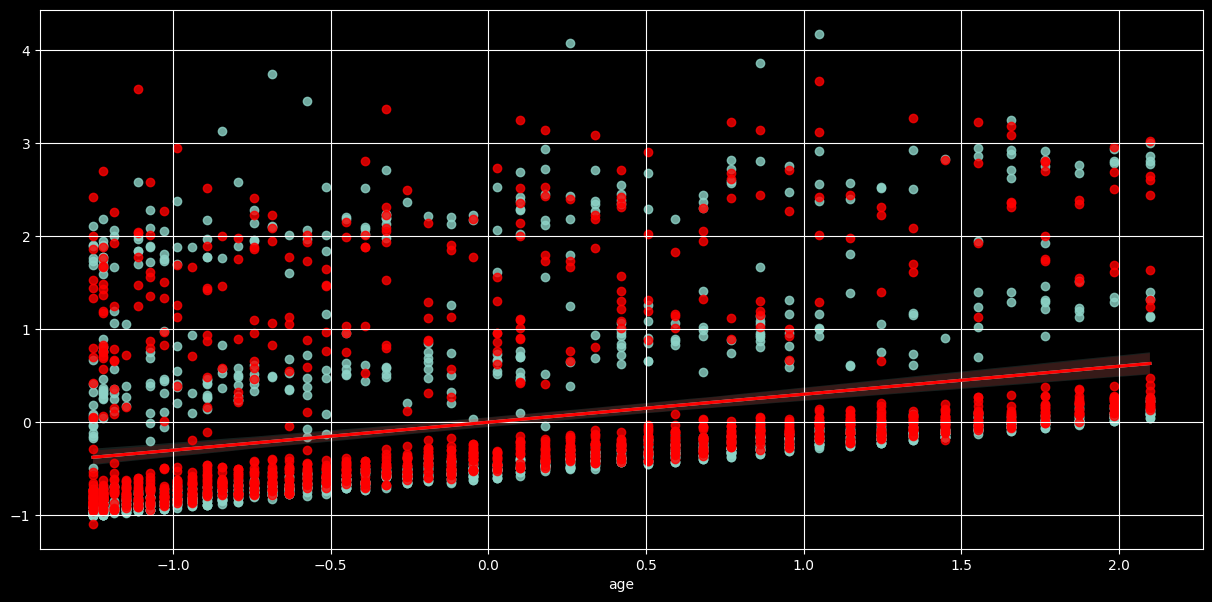

In [96]:
plt.figure(figsize=(15, 7))
sb.regplot(data=target_df, x='age', y='charges')
sb.regplot(data=target_df, x='age', y=ols_result.fit.fittedvalues, color='red')
plt.grid()
plt.plot()
plt.show()